In [98]:
from tslearn.clustering import TimeSeriesKMeans
import pickle
import numpy as np
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction import FPCA
import matplotlib.pyplot as plt
from itertools import combinations

# Caricamento delle serie temporali

In [99]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly = pickle.load(handle)

num_components = 4

# Caricamento della resa 

In [100]:
with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

# Pulizia dei dati

In [101]:
allPixelNDVIPoly = allPixelNDVIPoly[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

# Creazione formato dato per sklearn

In [102]:
DataGrid = FDataGrid(data_matrix=allPixelNDVIPoly,grid_points=range(len(allPixelNDVIPoly[0])))

In [103]:
fpca = FPCA(n_components=num_components)
FPCAscores = np.array(fpca.fit_transform(DataGrid))

In [104]:
print(FPCAscores)
print(len(newResa3))
print(len(allPixelNDVIPoly))
print(len(FPCAscores))

[[ 0.30542031  0.86851136  1.11474472  0.19611552]
 [ 0.45078095  0.41362709  0.43506899  0.2175478 ]
 [ 0.49024627  0.20122018  0.09089281  0.22418806]
 ...
 [ 0.31860066 -0.07899767  0.09030033  0.01452067]
 [ 0.54410896  0.01434716  0.20923058 -0.04152089]
 [ 0.58904178  0.20231863  0.52726146 -0.1880199 ]]
1471
1471
1471


In [105]:
score_array = (np.array(FPCAscores)-np.array(FPCAscores).min())/np.array(FPCAscores).max()
print(score_array.min())

0.0


1471


Text(0, 0.5, "Punto d'inizio")

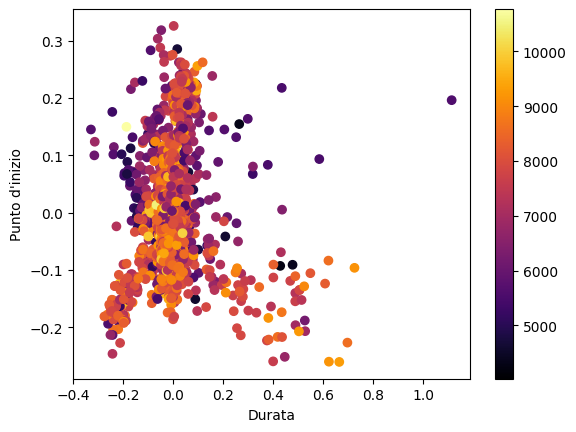

In [106]:
print(len(FPCAscores[:,0]))

fig, ax = plt.subplots()
scatter = ax.scatter(FPCAscores[:,2], FPCAscores[:,3],c=newResa3,cmap='inferno')
fig.colorbar(scatter)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

# Facciamo le permutazioni per tutte le possibili combinazioni di scores delle fpca

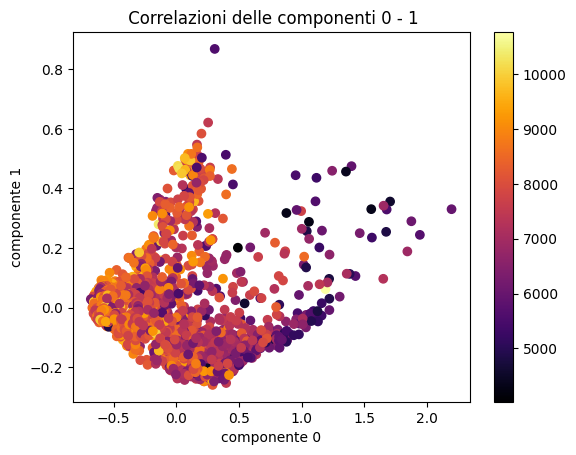

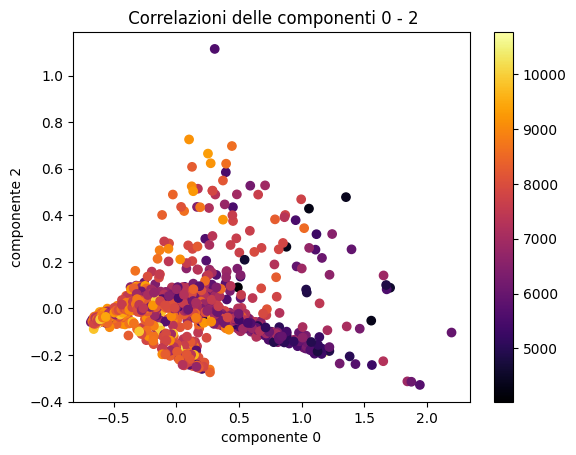

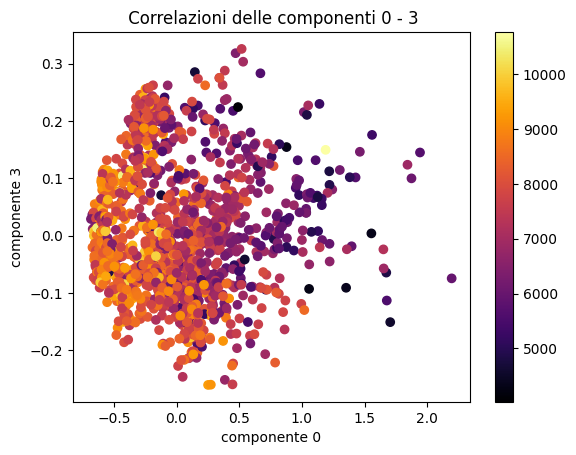

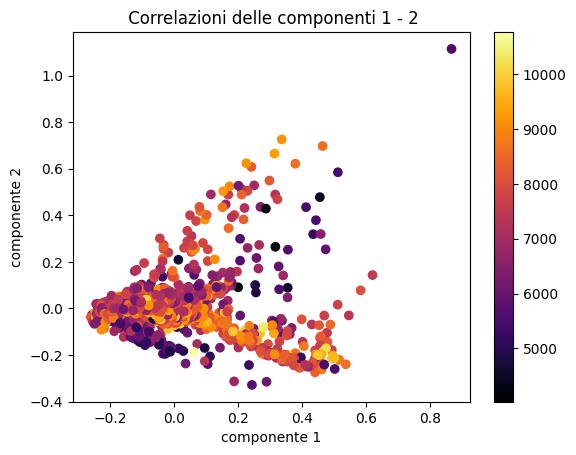

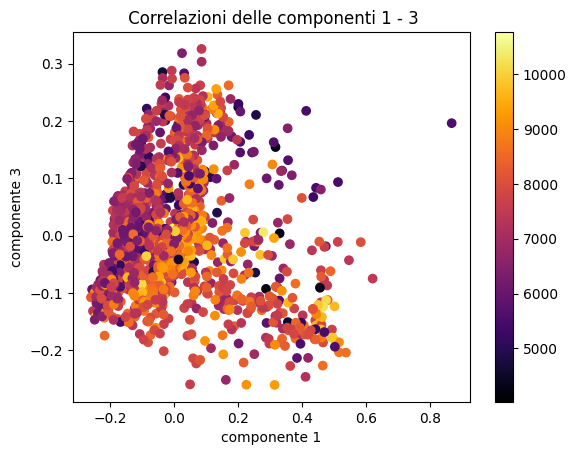

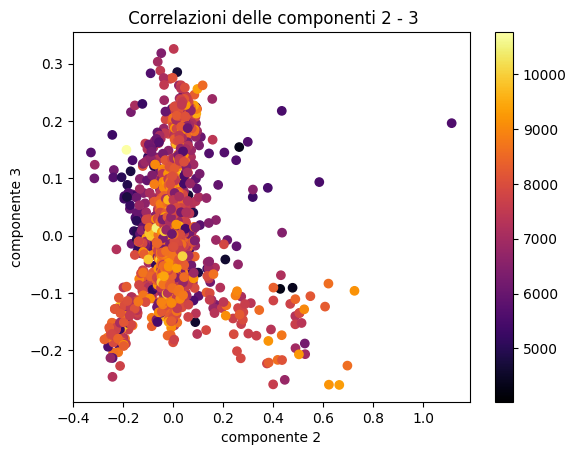

In [107]:
comb = list(combinations(range(num_components), 2))
for a in comb:
    fig, ax = plt.subplots()
    scatter = ax.scatter(FPCAscores[:,a[0]], FPCAscores[:,a[1]],c=newResa3,cmap='inferno')
    fig.colorbar(scatter)

    plt.xlabel("componente " +str(a[0]))
    plt.ylabel("componente " +str(a[1]))
    plt.title(" Correlazioni delle componenti "+str(a[0])+" - "+str(a[1]))

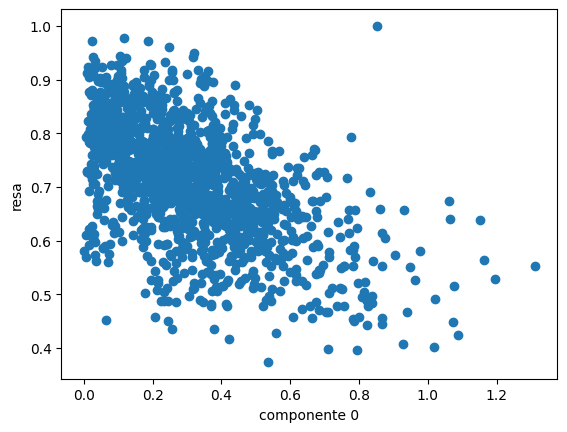

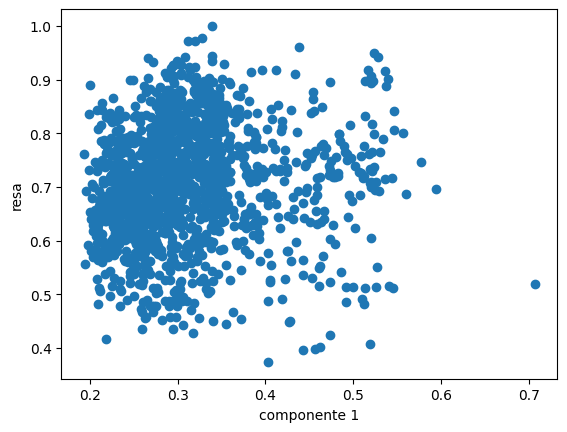

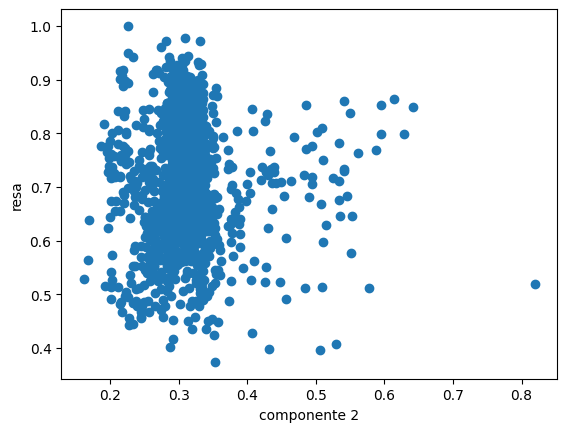

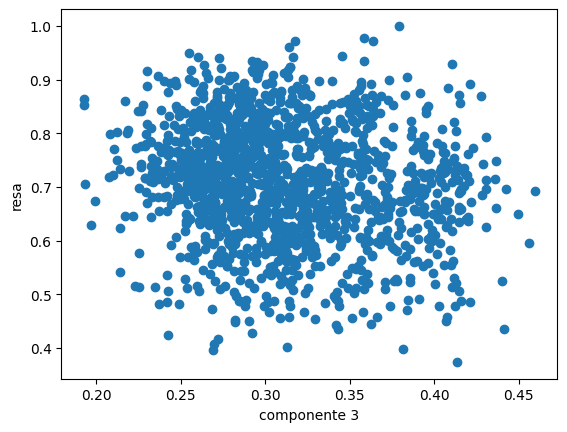

In [108]:
# Proviamo a mettere in relazione la resa con fpca scores 

for a in range(num_components):
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(score_array[:,a],(newResa3/newResa3.max()))
    plt.xlabel("componente " +str(a))
    plt.ylabel("resa")
